## **1. Import the dataset and libraries**


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [32]:
raw_dataset = pd.read_csv('dt_data.csv')

## **2. Splitting the Data**

#### **2.1 setup predictors and targets**

In [33]:
original_dataset = raw_dataset.copy().drop(columns=['#'])
class_map = {'A': 0, 'B': 1, 'D': 2, 'E': 3, 'O': 4}
original_dataset['Rank'] = original_dataset['Rank'].map(class_map)
original_dataset

,Rank,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,2,0.0,0.0,0.0,0.0,2.0,6.0,0.0,6.4,6.4
1,3,0.0,4.0,0.0,0.0,2.0,5.0,0.0,6.4,2.7
2,1,3.0,8.0,5.0,4.0,3.0,9.0,4.0,8.6,6.4
3,0,0.0,10.0,0.0,1.0,0.0,7.0,4.0,7.9,9.1
4,2,0.0,6.0,7.0,0.0,3.0,0.0,2.0,5.7,5.5
...,...,...,...,...,...,...,...,...,...,...
262,3,0.0,4.1,7.0,1.0,5.0,6.0,0.0,0.0,9.1
263,0,3.0,6.0,7.0,2.0,2.0,0.0,0.0,5.0,0.0
264,0,4.0,8.0,0.0,2.0,5.0,9.0,4.0,9.3,7.3
265,1,1.0,0.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0


In [35]:
X_selected = original_dataset.iloc[:, 1:]
X_selected

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,6.4,6.4
1,0.0,4.0,0.0,0.0,2.0,5.0,0.0,6.4,2.7
2,3.0,8.0,5.0,4.0,3.0,9.0,4.0,8.6,6.4
3,0.0,10.0,0.0,1.0,0.0,7.0,4.0,7.9,9.1
4,0.0,6.0,7.0,0.0,3.0,0.0,2.0,5.7,5.5
...,...,...,...,...,...,...,...,...,...
262,0.0,4.1,7.0,1.0,5.0,6.0,0.0,0.0,9.1
263,3.0,6.0,7.0,2.0,2.0,0.0,0.0,5.0,0.0
264,4.0,8.0,0.0,2.0,5.0,9.0,4.0,9.3,7.3
265,1.0,0.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0


In [36]:
X_selected.shape

(267, 9)

In [37]:
y = original_dataset['Rank']
y

0      2
1      3
2      1
3      0
4      2
      ..
262    3
263    0
264    0
265    1
266    3
Name: Rank, Length: 267, dtype: int64

#### **2.2 train test split**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)
X_train.shape, X_test.shape

((213, 9), (54, 9))

## **3. Decision Tree Models & Training**

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
my_tree = DecisionTreeClassifier()
# fit the model 
my_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
#predicting the target value from the model for the samples
y_test_tree = my_tree.predict(X_test)
y_train_tree = my_tree.predict(X_train)

In [55]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.4f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.4f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9953
Decision Tree: Accuracy on test Data: 0.2778


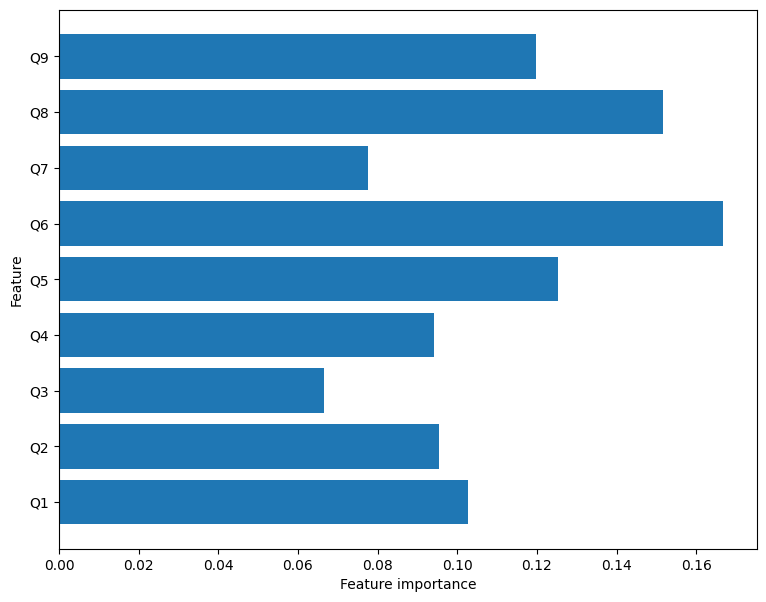

In [56]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), my_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### **2. Visualize**

In [57]:
from sklearn import tree
text_representation = tree.export_text(my_tree)
print(text_representation)

|--- feature_7 <= 1.05
|   |--- feature_3 <= 1.50
|   |   |--- feature_2 <= 2.00
|   |   |   |--- feature_5 <= 7.50
|   |   |   |   |--- feature_1 <= 6.05
|   |   |   |   |   |--- feature_1 <= 2.00
|   |   |   |   |   |   |--- feature_4 <= 4.00
|   |   |   |   |   |   |   |--- feature_5 <= 2.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_5 >  2.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_4 >  4.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_1 >  2.00
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_1 >  6.05
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  7.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  2.00
|   |   |   |--- feature_4 <= 1.00
|   |   |   |   |--- feature_2 <= 5.50
|   |   |   |   |   